In [2]:
import numpy as np

# Sample data matrix (4 samples, 3 features)
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

# Step 1: Prepare the data matrix
# Subtract the mean to center the data
X_centered = X - np.mean(X, axis=0)

# (Optional) Standardize each feature to have unit variance
X_standardized = X_centered #/ np.std(X_centered, axis=0)

# Step 2: Compute the SVD
U, S, Vt = np.linalg.svd(X_standardized, full_matrices=False)
V = Vt.T

# Step 3: Find the principal components (PCs)
# PCs are given by the columns of matrix V

# Step 4: Project the data onto the first k principal components
k = 2
X_projected = np.dot(X_standardized, V[:, :k])

# Inverse-transform the projected data back to the original feature space
X_reconstructed = np.dot(X_projected, V[:, :k].T)

# Un-standardize the reconstructed data (if the original data was standardized)
# X_reconstructed = X_reconstructed * np.std(X_centered, axis=0)

# Add the mean back to un-center the reconstructed data
X_reconstructed += np.mean(X, axis=0)

# Calculate the difference between the original data and the reconstructed data
difference = X - X_reconstructed

# Print the difference matrix
print("Difference between original and reconstructed data:\n", difference)


Difference between original and reconstructed data:
 [[ 8.88178420e-16  1.77635684e-15  0.00000000e+00]
 [ 0.00000000e+00  8.88178420e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.77635684e-15  0.00000000e+00]]


In [3]:
import numpy as np

def pca(X, k):
    # Step 1: Prepare the data matrix
    # Subtract the mean to center the data
    X_centered = X - np.mean(X, axis=0)

    # Step 2: Compute the SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    V = Vt.T

    # Step 3: Find the principal components (PCs)
    # PCs are given by the columns of matrix V

    # Step 4: Project the data onto the first k principal components
    X_projected = np.dot(X_centered, V[:, :k])

    return X_projected, V[:, :k]

# Sample data matrix (4 samples, 3 features)
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

# Perform PCA with k=2 principal components
k = 2
X_projected, principal_components = pca(X, k)

print("Projected data:\n", X_projected)


Projected data:
 [[-7.79422863e+00  1.69309011e-15]
 [-2.59807621e+00  6.38378239e-16]
 [ 2.59807621e+00 -6.38378239e-16]
 [ 7.79422863e+00 -1.69309011e-15]]


In [4]:
X.shape

(4, 3)

In [5]:
X_projected.shape

(4, 2)

In [6]:
principal_components.shape

(3, 2)

In [7]:
X_reconstructed = np.dot(X_projected, V[:, :k].T)

# Un-standardize the reconstructed data (if the original data was standardized)
# X_reconstructed = X_reconstructed * np.std(X_centered, axis=0)

# Add the mean back to un-center the reconstructed data
X_reconstructed += np.mean(X, axis=0)

# Calculate the difference between the original data and the reconstructed data
difference = X - X_reconstructed

# Print the difference matrix
print("Difference between original and reconstructed data:\n", difference)

Difference between original and reconstructed data:
 [[ 8.88178420e-16  1.77635684e-15  0.00000000e+00]
 [ 0.00000000e+00  8.88178420e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.77635684e-15  0.00000000e+00]]


In [29]:
import numpy as np

def svd(A, tol=1e-9):
    # Compute the covariance matrix
    C = np.dot(A.T, A)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(C)

    # Sort the eigenvalues and eigenvectors in descending order
    sort_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sort_indices]
    eigenvectors = eigenvectors[:, sort_indices]

    # Calculate singular values
    singular_values = np.sqrt(eigenvalues)

    # Compute the matrix V
    V = eigenvectors

    # Compute the matrix U
    U = np.zeros((A.shape[0], A.shape[1]))
    for i in range(A.shape[1]):
        if singular_values[i] > tol:
            U[:, i] = np.dot(A, V[:, i]) / singular_values[i]

    # Compute the matrix Sigma (Σ)
    Sigma = np.diag(singular_values)

    return U, Sigma, V.T

# Sample data matrix (4 samples, 3 features)
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

# Compute the SVD of the data matrix A
U, Sigma, Vt = svd(A)

# Check the decomposition: A = UΣV^T
reconstructed_A = np.dot(U, np.dot(Sigma, Vt))

print("U:\n", U)
print("Sigma:\n", Sigma)
print("Vt:\n", Vt)
print("Reconstructed A:\n", reconstructed_A)


U:
 [[-1.40876677e-01  8.24714352e-01 -3.34346129e-08]
 [-3.43946294e-01  4.26263940e-01 -2.14936797e-08]
 [-5.47015912e-01  2.78135286e-02 -7.16455991e-09]
 [-7.50085529e-01 -3.70636883e-01  0.00000000e+00]]
Sigma:
 [[2.54624074e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.29066168e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.85952472e-07]]
Vt:
 [[-0.50453315 -0.5745157  -0.64449826]
 [-0.76077568 -0.05714052  0.64649464]
 [ 0.40824829 -0.81649658  0.40824829]]
Reconstructed A:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


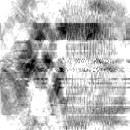

In [42]:
import numpy as np
from PIL import Image
from IPython.display import display
# def svd_compression(A, k):
#     U, Sigma, Vt = svd(A)
#     compressed_A = np.dot(U[:, :k], np.dot(np.diag(Sigma[:k]), Vt[:k, :]))
#     return compressed_A
# def svd_compression(A, k):
#     U, Sigma, Vt = svd(A)
    
#     compressed_A = np.zeros_like(A)
#     for i in range(k):
#         compressed_A += Sigma[i] * np.outer(U[:, i], Vt[i, :])
        
#     return compressed_A
def svd_compression(A, k):
    U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
    compressed_A = np.dot(U[:, :k], np.dot(np.diag(Sigma[:k]), Vt[:k, :]))
    return compressed_A
# Load the image
image = Image.open("images.png")

# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(gray_image, dtype=np.float64)

# Perform SVD compression with k most significant singular values
k = 50
compressed_image_array = svd(image_array, k)

# Clip the values to be in the range of [0, 255] and convert to uint8
compressed_image_array = np.clip(compressed_image_array, 0, 255).astype(np.uint8)

# Convert the compressed image array back to a PIL Image
compressed_image = Image.fromarray(compressed_image_array, mode="L")

# Save the compressed image
display(compressed_image)


In [ ]:
compressed_image.shape

In [30]:
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

In [33]:
Vt

array([[-0.50453315, -0.5745157 , -0.64449826],
       [-0.76077568, -0.05714052,  0.64649464],
       [-0.40824829,  0.81649658, -0.40824829]])

In [32]:
Sigma

array([2.54624074e+01, 1.29066168e+00, 1.38648772e-15])

In [31]:
U

array([[-0.14087668,  0.82471435,  0.53358462],
       [-0.34394629,  0.42626394, -0.8036038 ],
       [-0.54701591,  0.02781353,  0.00645373],
       [-0.75008553, -0.37063688,  0.26356544]])

In [34]:
U, Sigma, Vt = svd(A)

In [35]:
U

array([[-1.40876677e-01,  8.24714352e-01, -3.34346129e-08],
       [-3.43946294e-01,  4.26263940e-01, -2.14936797e-08],
       [-5.47015912e-01,  2.78135286e-02, -7.16455991e-09],
       [-7.50085529e-01, -3.70636883e-01,  0.00000000e+00]])

In [36]:
Sigma

array([[2.54624074e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.29066168e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.85952472e-07]])

d->ddd


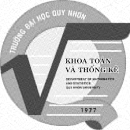

In [104]:
import numpy as np
from PIL import Image
from IPython.display import display

# def svd(A, tol=1e-9):
#     C = np.dot(A.T, A)
#     eigenvalues, eigenvectors = np.linalg.eig(C)
    
#     # Sort the eigenvalues and eigenvectors in descending order
#     sorted_indices = np.argsort(eigenvalues)[::-1]
#     eigenvalues = eigenvalues[sorted_indices]
#     eigenvectors = eigenvectors[:, sorted_indices]
    
#     singular_values = np.sqrt(eigenvalues)
#     V = eigenvectors
#     U = np.zeros((A.shape[0], A.shape[1]))
#     for i in range(A.shape[1]):
#         if singular_values[i] > tol:
#             U[:, i] = np.dot(A, V[:, i]) / singular_values[i]
#     Sigma = np.diag(singular_values)
#     return U, Sigma, V.T


def svd_compression(A, k):
    U, Sigma, Vt = svd(A)
    compressed_A = np.zeros_like(A)
    for i in range(k):
        compressed_A += Sigma[i] * np.outer(U[:, i], Vt[i, :])
    return compressed_A

# Load the image
image = Image.open("images.png")

# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(gray_image, dtype=np.float64)

# Perform SVD compression with k most significant singular values
k = 50
compressed_image_array = svd_compression(image_array, k)

# Clip the values to be in the range of [0, 255] and convert to uint8
compressed_image_array = np.clip(compressed_image_array, 0, 255)

# Normalize the values to be between 0 and 1
compressed_image_array /= 255.0

# Convert the compressed image array back to a PIL Image
compressed_image = Image.fromarray(np.uint8(compressed_image_array * 255), mode="L")

# Display the compressed image
display(compressed_image)


In [82]:
from numpy.core import asarray,single, double,inexact,complexfloating
from numpy.linalg import _umath_linalg

In [39]:
def svd(A, i):
    Ui = A.dot(A.transpose())
    Vi = A.transpose().dot(A)
    eig_values, U = np.linalg.eig(Ui)
    U = U.real
    eig_values.real
    V_eig_values, V = np.linalg.eig(Vi)
    V = V.real
    V_eig_values.real
    Si = np.diag(eig_values)  #Diagonal matrix with the diagonal elements as the eigen values
    Si = np.sqrt(Si)
    S = np.zeros((A.shape[0], A.shape[1]))  #Creating a rectangular matrix that'll act as the base for the actual Sigma matrix
    S[:A.shape[0], :A.shape[0]] = Si 
    comp_image = np.dot(U[:,:i],(np.dot(S[:i,:i],V[:,:i].transpose())))
    return comp_image

In [102]:
_real_types_map = {single : single,
                   double : double}

def _realType(t, default=double):
    return _real_types_map.get(t, default)
def isComplexType(t):
    return issubclass(t, complexfloating)
# def _makearray(a):
#     new = asarray(a)
#     wrap = getattr(a, "__array_prepare__", new.__array_wrap__)
#     return new, wrap
# def _assert_stacked_2d(*arrays):
#     for a in arrays:
#         if a.ndim < 2:
#             raise LinAlgError('%d-dimensional array given. Array must be '
#                     'at least two-dimensional' % a.ndim)
            
def _commonType(*arrays):
    # in lite version, use higher precision (always double or cdouble)
    result_type = single
    is_complex = False
    for a in arrays:
        if issubclass(a.dtype.type, inexact):
            if isComplexType(a.dtype.type):
                is_complex = True
            rt = _realType(a.dtype.type, default=None)
            if rt is None:
                # unsupported inexact scalar
                raise TypeError("array type %s is unsupported in linalg" %
                        (a.dtype.name,))
        else:
            rt = double
        if rt is double:
            result_type = double
    if is_complex:
        t = cdouble
        result_type = _complex_types_map[result_type]
    else:
        t = double
    return t, result_type

In [103]:
def svd(a):
    import numpy as _nx
#     a, wrap = _makearray(a)
#     _assert_stacked_2d(a)
    t, result_t = _commonType(a)

    m, n = a.shape[-2:]

    if m < n:
        gufunc = _umath_linalg.svd_m_s
    else:
        gufunc = _umath_linalg.svd_n_s

    signature = 'D->DdD' if isComplexType(t) else 'd->ddd'
    print(signature)
    u, s, vh = gufunc(a, signature=signature)
    u = u.astype(result_t, copy=False)
    s = s.astype(_realType(result_t), copy=False)
    vh = vh.astype(result_t, copy=False)
    return u, s, vh

In [92]:
A_test = np.copy(image_array)

In [94]:
A_test

dtype('float64')

In [95]:
A_test, wrap = _makearray(A_test)

In [96]:
wrap

<function ndarray.__array_prepare__>

In [90]:
a, wrap = _makearray(a)
_assert_stacked_2d(a)
t, result_t = _commonType(a)

m, n = a.shape[-2:]

if m < n:
    gufunc = _umath_linalg.svd_m_s
else:
    gufunc = _umath_linalg.svd_n_s

signature = 'D->DdD' if isComplexType(t) else 'd->ddd'
u, s, vh = gufunc(a, signature=signature)
u = u.astype(result_t, copy=False)
s = s.astype(_realType(result_t), copy=False)
vh = vh.astype(result_t, copy=False)

NameError: name 'a' is not defined